# Hotel Booking Cancellation Analysis & Prediction

## Project Background

Perusahaan booking penginapan menghadapi tantangan dalam menjaga stabilitas okupansi hotel akibat tingginya tingkat pembatalan reservasi serta fluktuasi jumlah booking berdasarkan waktu dan segmen pelanggan.

Dataset yang digunakan berisi data reservasi hotel dari berbagai segmen pelanggan, channel distribusi, waktu pemesanan, serta karakteristik tamu. Analisis dilakukan untuk memahami perilaku pelanggan dan mendukung pengambilan keputusan bisnis berbasis data.

## Problem Statement

### Masalah Utama

Tingginya tingkat pembatalan reservasi serta variasi jumlah booking yang dipengaruhi oleh waktu pemesanan dan segmen pelanggan.

### Tujuan Bisnis / Objective Project

- Mengidentifikasi faktor utama yang memengaruhi pembatalan booking
- Membangun model prediksi pembatalan booking untuk mendukung strategi pencegahan cancel
- Memberikan rekomendasi strategi bisnis berbasis data untuk menurunkan tingkat pembatalan dan meningkatkan stabilitas revenue hotel.

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## Load Dataset

In [3]:
# Load Dataset
df = pd.read_csv("D:\\Interview\\train.csv")  
# display table
display(df.head(),df.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
83288,"Crystal Cove, Barbados Barbados",0,4,2018,October,44,25,0,2,2,1.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,169.00,1,1,Check-Out,2018-10-27,83289
83289,"Berlin Marriott Hotel Berlin, Germany",0,30,2017,September,38,14,1,3,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,94.50,0,2,Check-Out,2017-09-18,83290
83290,"The Ritz-Carlton, Tokyo Tokyo, Japan",0,165,2019,June,25,21,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,123.50,0,1,Check-Out,2019-07-05,83291
83291,"Colony Club, Barbados Barbados",0,180,2018,July,32,31,2,4,2,1.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,9.0,NaN,0,Transient,122.25,0,1,Check-Out,2018-08-06,83292
83292,"Las Vegas Marriott Las Vegas, NV",0,290,2018,October,43,20,2,3,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,9.0,NaN,0,Transient-Party,90.95,0,0,Check-Out,2018-10-25,83293


## Data Understanding

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83290.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,71889.000000,4734.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000
mean,0.369503,103.914230,2018.156808,27.164023,15.786116,0.930390,2.503812,1.854466,0.103614,0.008032,0.030243,0.086994,0.141765,0.223068,86.867282,190.003802,2.352238,101.724373,0.061818,0.571945,41647.000000
std,0.482673,106.874124,0.706656,13.623752,8.775931,1.004196,1.924511,0.606139,0.398821,0.100641,0.171255,0.862988,1.554390,0.656237,110.875605,131.969152,17.820652,48.082552,0.245027,0.793742,24044.762323
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.530000,0.000000,0.000000,20824.000000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,183.000000,0.000000,94.500000,0.000000,0.000000,41647.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,62470.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,70.000000,21.000000,535.000000,543.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


In [5]:
df.isnull().sum().sort_values(ascending=False)

company                           78559
agent                             11404
country                             346
children                              3
hotel                                 0
arrival_date_week_number              0
arrival_date_day_of_month             0
is_canceled                           0
lead_time                             0
stays_in_week_nights                  0
stays_in_weekend_nights               0
babies                                0
adults                                0
meal                                  0
market_segment                        0
arrival_date_year                     0
arrival_date_month                    0
is_repeated_guest                     0
distribution_channel                  0
previous_cancellations                0
previous_bookings_not_canceled        0
assigned_room_type                    0
reserved_room_type                    0
deposit_type                          0
booking_changes                       0


In [6]:
((df.isnull().sum() / len(df)) * 100).round(2).sort_values(ascending=False)

company                           94.32
agent                             13.69
country                            0.42
hotel                              0.00
is_canceled                        0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
arrival_date_year                  0.00
lead_time                          0.00
stays_in_week_nights               0.00
adults                             0.00
babies                             0.00
children                           0.00
meal                               0.00
market_segment                     0.00
stays_in_weekend_nights            0.00
arrival_date_month                 0.00
is_repeated_guest                  0.00
distribution_channel               0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
assigned_room_type                 0.00
reserved_room_type                 0.00
deposit_type                       0.00
booking_changes                    0.00


In [7]:
df.duplicated().sum()

np.int64(0)

## Data Preparation

### Data Cleaning & Feature Engineering

In [8]:
# Handle missing values
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna("Unknown")
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Convert datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Feature Engineering
df['total_night'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guest'] = df['adults'] + df['children'] + df['babies']

# Save for Power BI
df.to_csv("hotel_booking_cleaned.csv", index=False)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_night,total_guest
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4,2.0
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,0.0,0,Transient,62.80,0,0,Canceled,2017-10-21,2,2,2.0
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,0.0,0,Transient,110.00,0,0,Canceled,2018-11-25,3,3,2.0
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,Unknown,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4,1,1.0
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,0.0,0,Transient,57.92,0,1,Canceled,2017-08-24,5,5,2.0


## Exploratory Data Analysis (EDA)

### Informasi Hotel & Status Booking

#### Distribusi Jenis Hotel

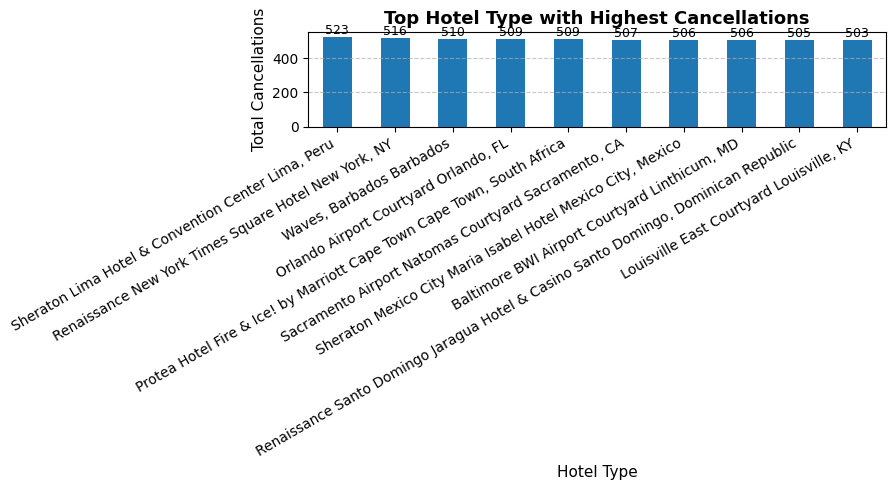

In [9]:
plt.figure(figsize=(9,5))

# Filter hanya booking yang cancel
cancel_df = df[df['is_canceled'] == 1]

# jumlah cancel per hotel
ax = cancel_df['hotel'].value_counts().head(10).plot(kind='bar')

plt.title("Top Hotel Type with Highest Cancellations", fontsize=13, fontweight='bold')
plt.xlabel("Hotel Type", fontsize=11)
plt.ylabel("Total Cancellations", fontsize=11)

plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()

Data diatas merupakan hotel paling banyak customer yang **Canceled** urutan pertama adalah hotel Sheraton lima hotel & convention center lima, Peru

#### Distribusi Status Reservasi

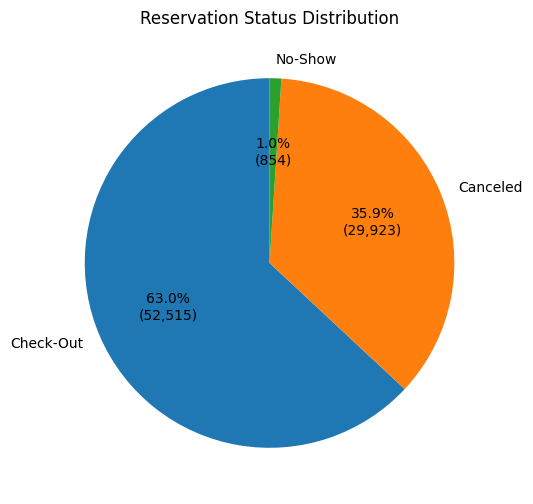

In [10]:
plt.figure(figsize=(6,6))

status_counts = df['reservation_status'].value_counts()

plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*status_counts.sum()):,})',
    startangle=90
)

plt.title("Reservation Status Distribution")
plt.show()

Mayoritas booking berhasil **check-out** Sekitar **63% booking berhasil menginap** sesuai rencana.

Tingkat **canceled** cukup tinggi Sekitar **36% booking dibatalkan** sebelum check-in.

No-Show relatif kecil hanya sekitar **1% booking yang tidak datang tanpa pembatalan**.

#### Tren Status Reservasi dari Waktu

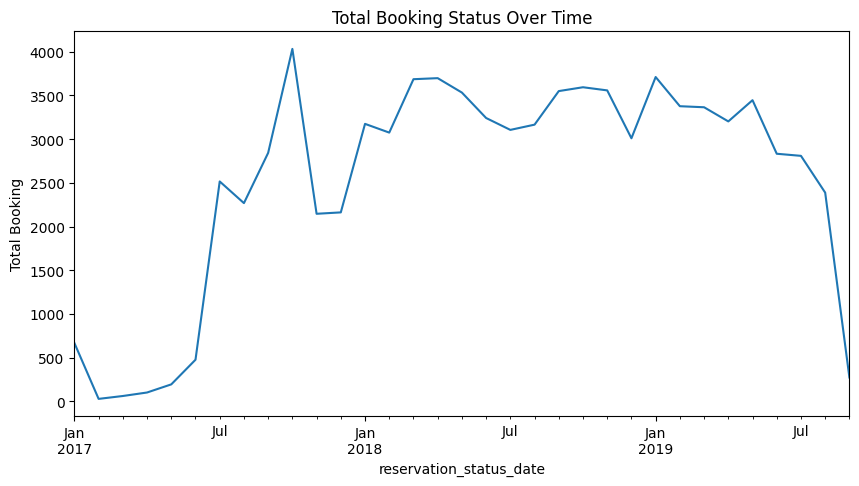

In [11]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

status_time = df.groupby(df['reservation_status_date'].dt.to_period("M"))['bookingID'].count()

plt.figure(figsize=(10,5))
status_time.plot()
plt.title("Total Booking Status Over Time")
plt.ylabel("Total Booking")
plt.show()

Grafik menunjukkan bahwa jumlah booking hotel mengalami pola musiman yang cukup jelas. Terjadi peningkatan signifikan mulai pertengahan 2017, kemudian relatif stabil di kisaran 3.000–3.700 booking per bulan sepanjang 2018 hingga awal 2019. Penurunan tajam di awal dan akhir periode kemungkinan disebabkan oleh data yang belum lengkap.

###  Target Analysis — Cancellation

#### Cancellation Rate

In [12]:
cancel_rate = df['is_canceled'].mean()*100
print(f"Cancellation Rate: {cancel_rate:.2f}%")

Cancellation Rate: 36.95%


#### Distribusi Cancel vs Not Cancel

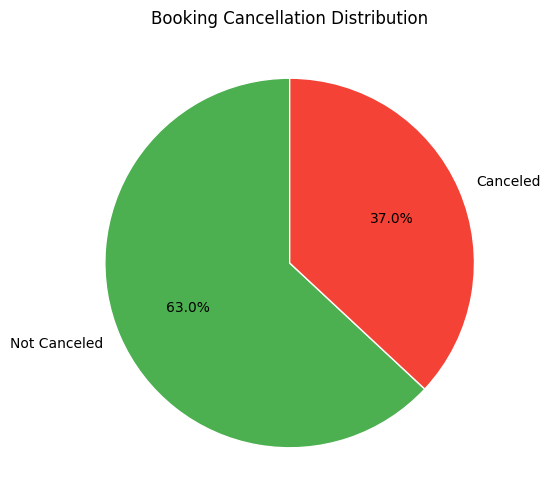

In [13]:
plt.figure(figsize=(6,6))

counts = df['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']
colors = ['#4CAF50', '#F44336']

plt.pie(counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor':'white'})

plt.title("Booking Cancellation Distribution")
plt.show()

Mayoritas booking berhasil check-out Sekitar **63% booking berhasil** menginap sesuai rencana.

Tingkat canceled cukup tinggi Sekitar **37% booking dibatalkan** sebelum check-in.

### Waktu Booking & Kedatangan

#### Distribusi Lead Time

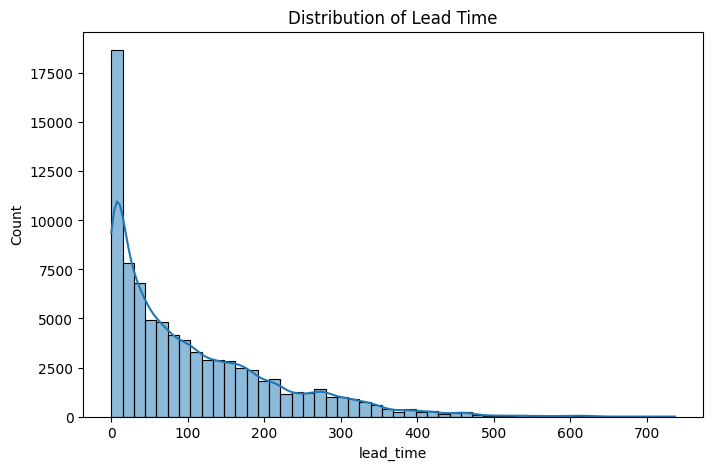

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title("Distribution of Lead Time")
plt.show()

Grafik menunjukkan bahwa sebagian besar pelanggan melakukan booking dengan lead time yang pendek (mendekati hari kedatangan). Namun terdapat ekor panjang ke kanan yang menunjukkan adanya booking yang dilakukan sangat jauh hari sebelumnya, bahkan hingga lebih dari 700 hari.

Semakin panjang lead time, semakin tinggi potensi pembatalan karena rencana pelanggan bisa berubah. Oleh karena itu, booking dengan lead time panjang sebaiknya dikenakan kebijakan deposit atau non-refundable untuk mengurangi risiko cancel.

#### Booking per Tahun

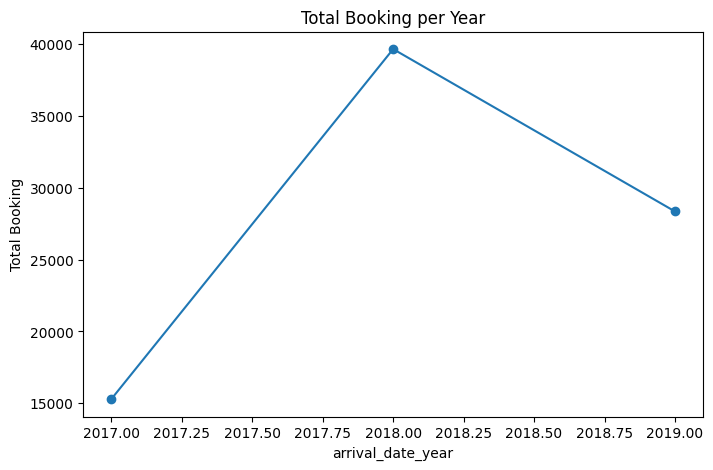

In [15]:
booking_year = df.groupby('arrival_date_year')['bookingID'].count()

plt.figure(figsize=(8,5))
booking_year.plot(marker='o')
plt.title("Total Booking per Year")
plt.ylabel("Total Booking")
plt.show()

reservasi terbanyak terjadi pada tahun 2018

#### Booking per Bulan (Musiman)

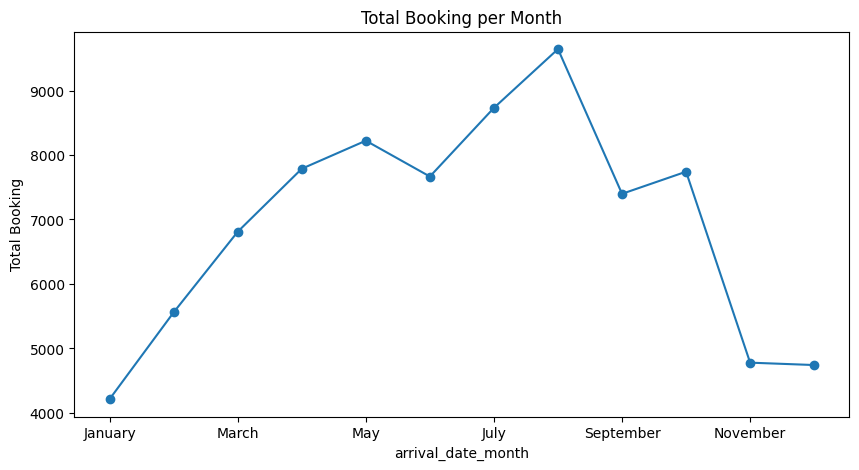

In [16]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

booking_month = df.groupby('arrival_date_month')['bookingID'].count()

plt.figure(figsize=(10,5))
booking_month.plot(marker='o')
plt.title("Total Booking per Month")
plt.ylabel("Total Booking")
plt.show()

Grafik menunjukkan adanya pola musiman yang kuat pada pemesanan hotel. Jumlah booking cenderung meningkat pada pertengahan tahun (sekitar Juni–Agustus) dan kembali naik di akhir tahun, sementara awal tahun relatif lebih rendah.

#### Lead Time vs Cancellation

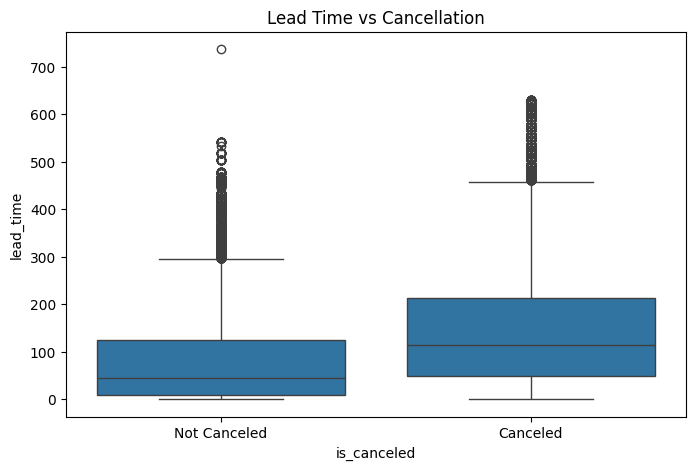

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.title("Lead Time vs Cancellation")
plt.show()

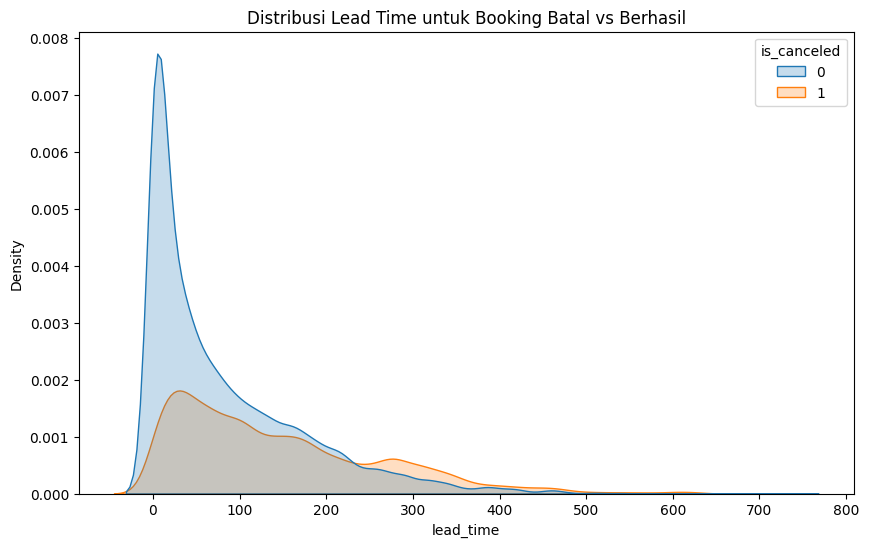

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='lead_time', hue='is_canceled', shade=True)
plt.title('Distribusi Lead Time untuk Booking Batal vs Berhasil')
plt.show()

Grafik menunjukkan bahwa booking yang **tidak dibatalkan (is_canceled = 0)** didominasi oleh lead time yang sangat pendek, artinya sebagian besar pelanggan yang booking mendekati tanggal kedatangan cenderung benar-benar menginap.

Sebaliknya, booking yang **dibatalkan (is_canceled = 1)** memiliki distribusi lead time yang lebih panjang dan menyebar hingga ratusan hari sebelum kedatangan.

Semakin panjang lead time, semakin tinggi risiko pembatalan.

### Lama Menginap

#### Distribusi Total Night

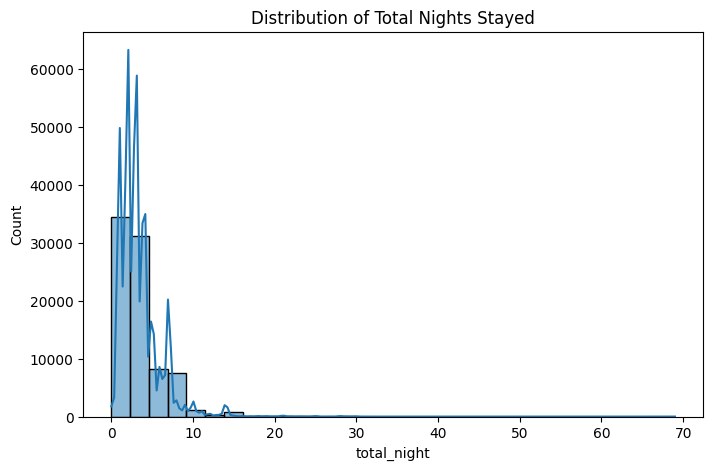

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_night'], bins=30, kde=True)
plt.title("Distribution of Total Nights Stayed")
plt.show()

Pola Distribusi: Data memiliki kemiringan positif **(right-skewed)** yang sangat ekstrem. Artinya, sebagian besar tamu menginap dalam durasi singkat, sementara hanya sedikit sekali yang menginap dalam jangka waktu lama.

Durasi Terpopuler: Mayoritas tamu menginap antara **1 hingga 5 malam**. Puncak tertinggi (modus) berada di sekitar angka 2 atau 3 malam, dengan jumlah mencapai lebih dari 60.000 (berdasarkan garis estimasi densitas).

Penurunan Drastis: Terjadi penurunan jumlah tamu yang sangat signifikan setelah durasi 10 malam. Tamu yang menginap di atas 20 malam jumlahnya hampir tidak terlihat pada skala grafik ini.

Layanan ini didominasi oleh tamu jangka pendek (seperti wisatawan akhir pekan atau perjalanan bisnis singkat).

#### Total Night vs Cancel

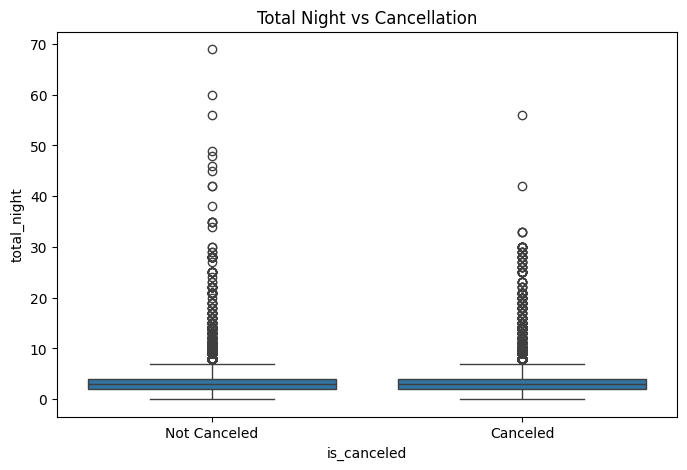

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='is_canceled', y='total_night')
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.title("Total Night vs Cancellation")
plt.show()

Rata-rata (median) durasi menginap untuk pesanan yang dibatalkan maupun yang tidak dibatalkan terlihat sangat serupa, yaitu berada di kisaran 3 malam.

Kotak biru pada kedua kategori menunjukkan bahwa mayoritas tamu (50% data tengah) menginap dalam durasi yang sama, yaitu antara 2 hingga 4 malam.

Kedua kelompok memiliki banyak pencilan (outliers) yang menunjukkan durasi menginap sangat panjang (di atas 10 malam).

Kelompok "Not Canceled" memiliki nilai ekstrem yang lebih tinggi (mencapai hampir 70 malam) dibandingkan kelompok "Canceled" (sekitar 56 malam).

Secara keseluruhan, **durasi menginap tidak memiliki pengaruh signifikan terhadap keputusan tamu untuk membatalkan pesanan**, karena profil durasi menginap pada kedua kelompok hampir identik.

### Karakteristik Tamu

#### Distribusi Total Guest

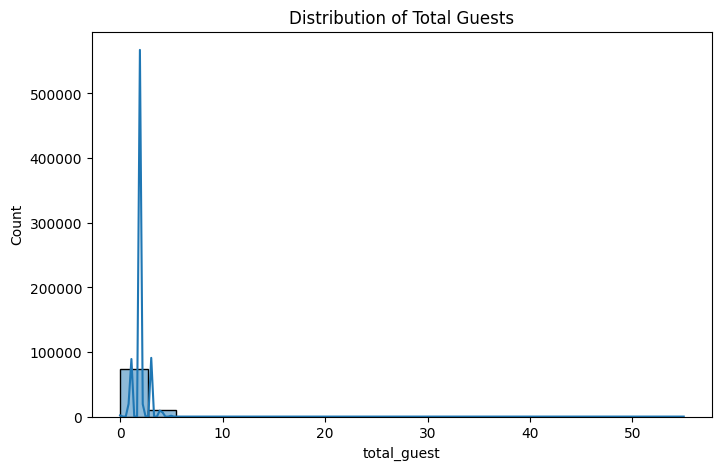

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_guest'], bins=20, kde=True)
plt.title("Distribution of Total Guests")
plt.show()

Terjadi konsentrasi massa yang sangat tinggi pada angka -+2 tamu, dengan jumlah mencapai lebih dari 500.000 pesanan.

Pesanan didominasi oleh pasangan atau grup kecil (1-4 orang).

Terdapat pencilan ekstrem di mana ada pesanan untuk lebih dari 50 tamu, namun frekuensinya sangat langka.

Profil pelanggan utama adalah pasangan (2 orang).

#### Repeated Guest vs Cancellation

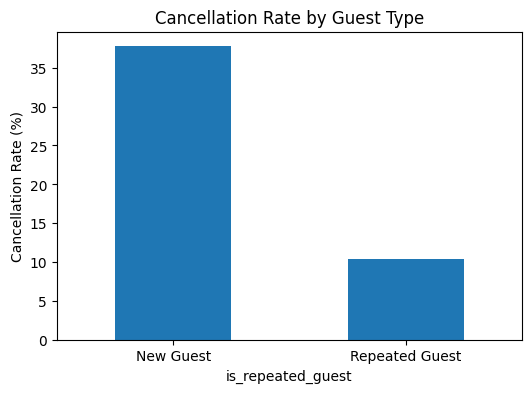

In [22]:
repeat_cancel = df.groupby('is_repeated_guest')['is_canceled'].mean()*100

plt.figure(figsize=(6,4))
repeat_cancel.plot(kind='bar')
plt.xticks([0,1], ['New Guest', 'Repeated Guest'], rotation=0)
plt.title("Cancellation Rate by Guest Type")
plt.ylabel("Cancellation Rate (%)")
plt.show()

Tamu baru (New Guest) memiliki tingkat pembatalan yang jauh lebih tinggi, yakni hampir 38%.

Tamu langganan (Repeated Guest) jauh lebih stabil dengan tingkat pembatalan hanya sekitar 10%.

Status tamu merupakan faktor penentu penting; tamu yang pernah menginap sebelumnya memiliki loyalitas yang jauh lebih tinggi dan jarang membatalkan pesanan.

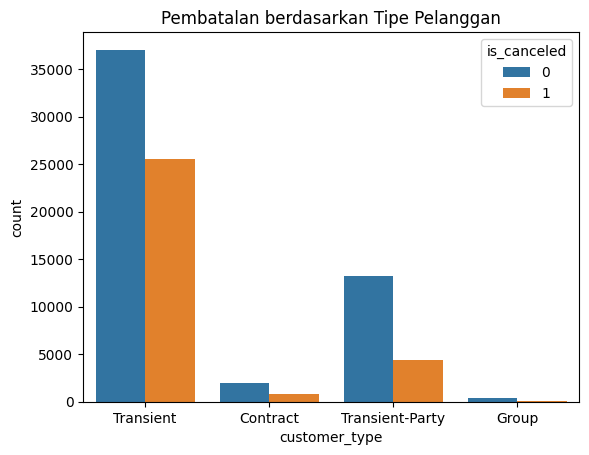

In [58]:
sns.countplot(data=df, x='customer_type', hue='is_canceled')
plt.title("Pembatalan berdasarkan Tipe Pelanggan")
plt.show()

Pelanggan kategori Transient adalah penyumbang volume pesanan sekaligus volume pembatalan terbesar.

### Channel & Segmentasi

#### Booking by Market Segment

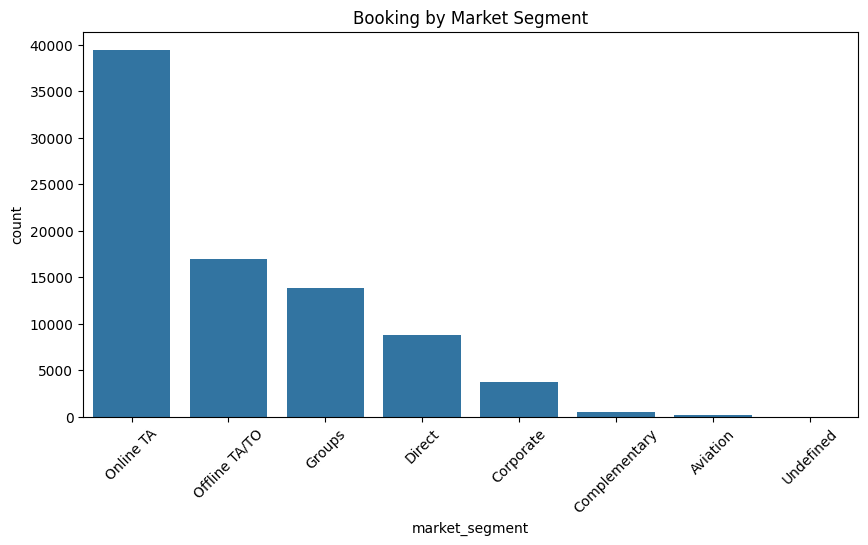

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='market_segment', order=df['market_segment'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Booking by Market Segment")
plt.show()

chanel Utama: Segmen Online TA (Travel Agent) adalah penyumbang pesanan terbesar dengan jumlah hampir 40.000.

chanel Lain: Segmen Offline TA/TO dan Groups menempati posisi berikutnya, sementara segmen seperti Aviation sangat kecil kontribusinya.

Hotel sangat bergantung pada agen perjalanan online dan tamu baru, namun kelompok ini juga yang paling berisiko melakukan pembatalan.

#### Cancellation Rate by Market Segment

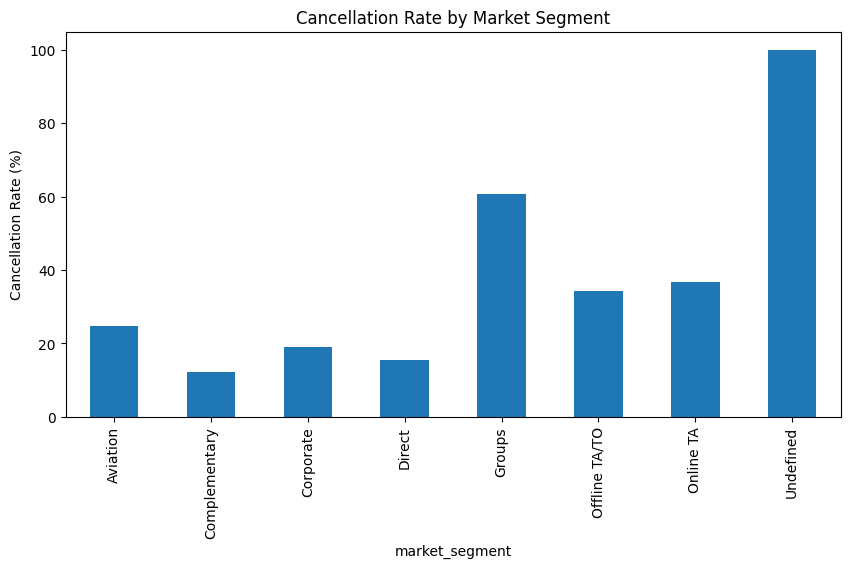

In [24]:
segment_cancel = df.groupby('market_segment')['is_canceled'].mean()*100

plt.figure(figsize=(10,5))
segment_cancel.plot(kind='bar')
plt.title("Cancellation Rate by Market Segment")
plt.ylabel("Cancellation Rate (%)")
plt.show()

Meskipun volume pesanannya tinggi, segmen Groups memiliki tingkat pembatalan yang sangat besar (di atas 60%). Sementara itu, segmen Online TA berada di angka sekitar 37%.

Hotel sangat bergantung pada pasar Online TA dan tamu baru, namun kedua kelompok ini (terutama kategori Groups) membawa risiko pembatalan yang tinggi bagi operasional hotel.

#### Cancellation by Distribution Channel

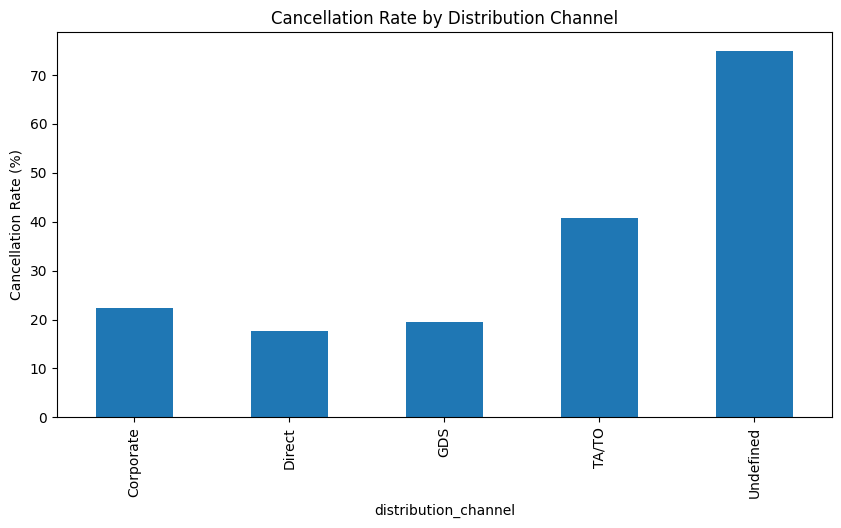

In [25]:
channel_cancel = df.groupby('distribution_channel')['is_canceled'].mean()*100

plt.figure(figsize=(10,5))
channel_cancel.plot(kind='bar')
plt.title("Cancellation Rate by Distribution Channel")
plt.ylabel("Cancellation Rate (%)")
plt.show()

Saluran TA/TO (Travel Agent/Tour Operator) mencatat tingkat pembatalan sekitar 40%, jauh lebih tinggi dibandingkan saluran Direct, Corporate, atau GDS.

Hotel memiliki ketergantungan tinggi pada agen perjalanan online, namun menghadapi risiko operasional besar dari tamu baru dan segmen grup karena tingginya tingkat pembatalan mereka.

### Tipe Booking & Kebijakan

#### Cancellation by Deposit Type

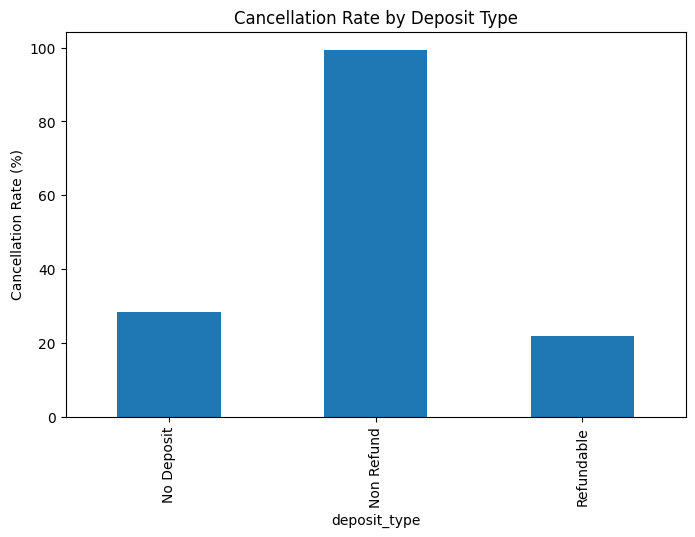

In [26]:
deposit_cancel = df.groupby('deposit_type')['is_canceled'].mean()*100

plt.figure(figsize=(8,5))
deposit_cancel.plot(kind='bar')
plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation Rate (%)")
plt.show()

Pesanan dengan status Non Refund secara mengejutkan memiliki tingkat pembatalan hampir 100%.

Hotel sangat bergantung pada tamu baru dan agen perjalanan online, namun kedua kategori ini memiliki risiko pembatalan yang signifikan. Selain itu, kebijakan deposit "Non Refund" justru berkaitan dengan tingkat pembatalan yang sangat ekstrem dalam dataset ini.

#### Booking Changes vs Cancel

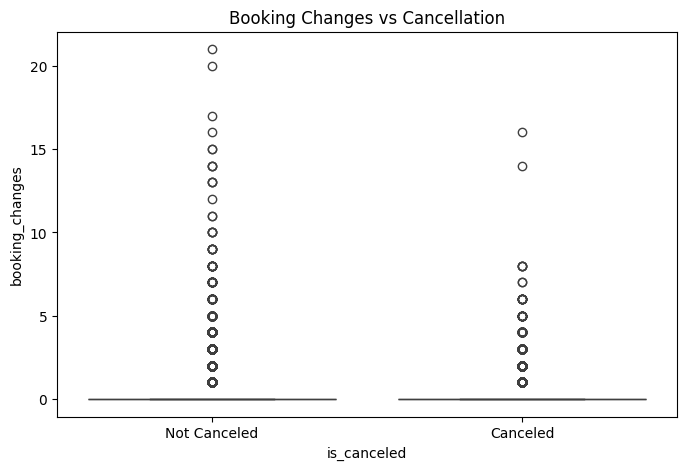

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='is_canceled', y='booking_changes')
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.title("Booking Changes vs Cancellation")
plt.show()

Sebagian besar pesanan, baik yang batal maupun tidak, memiliki 0 perubahan (booking changes). Namun, pesanan yang tidak batal memiliki sebaran pencilan (outliers) perubahan yang lebih banyak hingga 20 kali.

### Harga & Permintaan Khusus

#### Distribusi Harga (ADR)

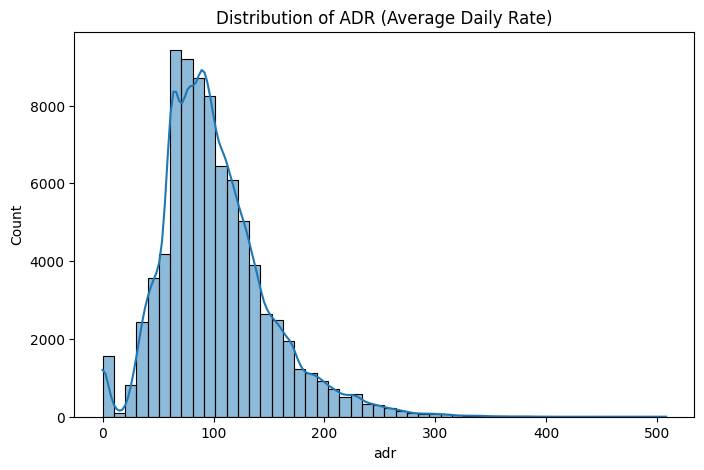

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title("Distribution of ADR (Average Daily Rate)")
plt.show()

Sebaran harga harian rata-rata menunjukkan puncak tertinggi berada di kisaran 70 hingga 100 dolar. Data ini melandai ke arah kanan (skewed right), yang berarti hanya sedikit tamu yang membayar tarif sangat tinggi di atas 200.

#### ADR vs Cancellation

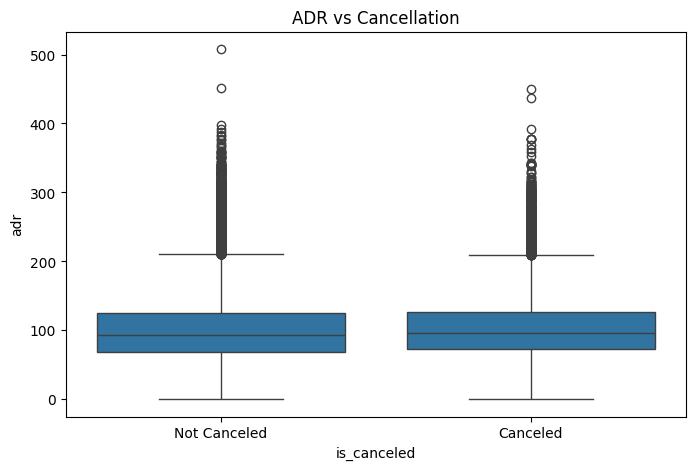

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='is_canceled', y='adr')
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.title("ADR vs Cancellation")
plt.show()

Mayoritas harga harian rata-rata berada di kisaran 70 hingga 100. Rata-rata tarif antara pesanan yang batal dan tidak batal cenderung serupa.

#### Special Requests vs Cancellation

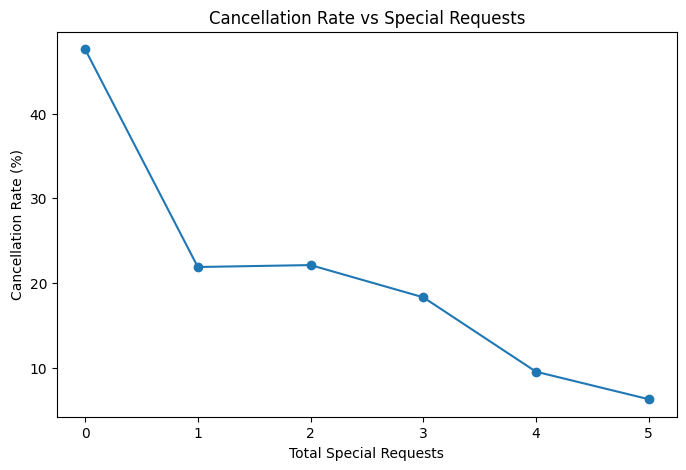

In [30]:
special_cancel = df.groupby('total_of_special_requests')['is_canceled'].mean()*100

plt.figure(figsize=(8,5))
special_cancel.plot(marker='o')
plt.title("Cancellation Rate vs Special Requests")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Total Special Requests")
plt.show()

Tamu dengan 0 permintaan khusus memiliki tingkat pembatalan tertinggi (hampir 50%), sedangkan tamu dengan 5 permintaan khusus memiliki tingkat pembatalan terendah (di bawah 10%).

Tamu yang lebih "terlibat" (melakukan permintaan khusus atau perubahan pesanan) cenderung lebih berkomitmen untuk datang.

### Heatmap Korelasi

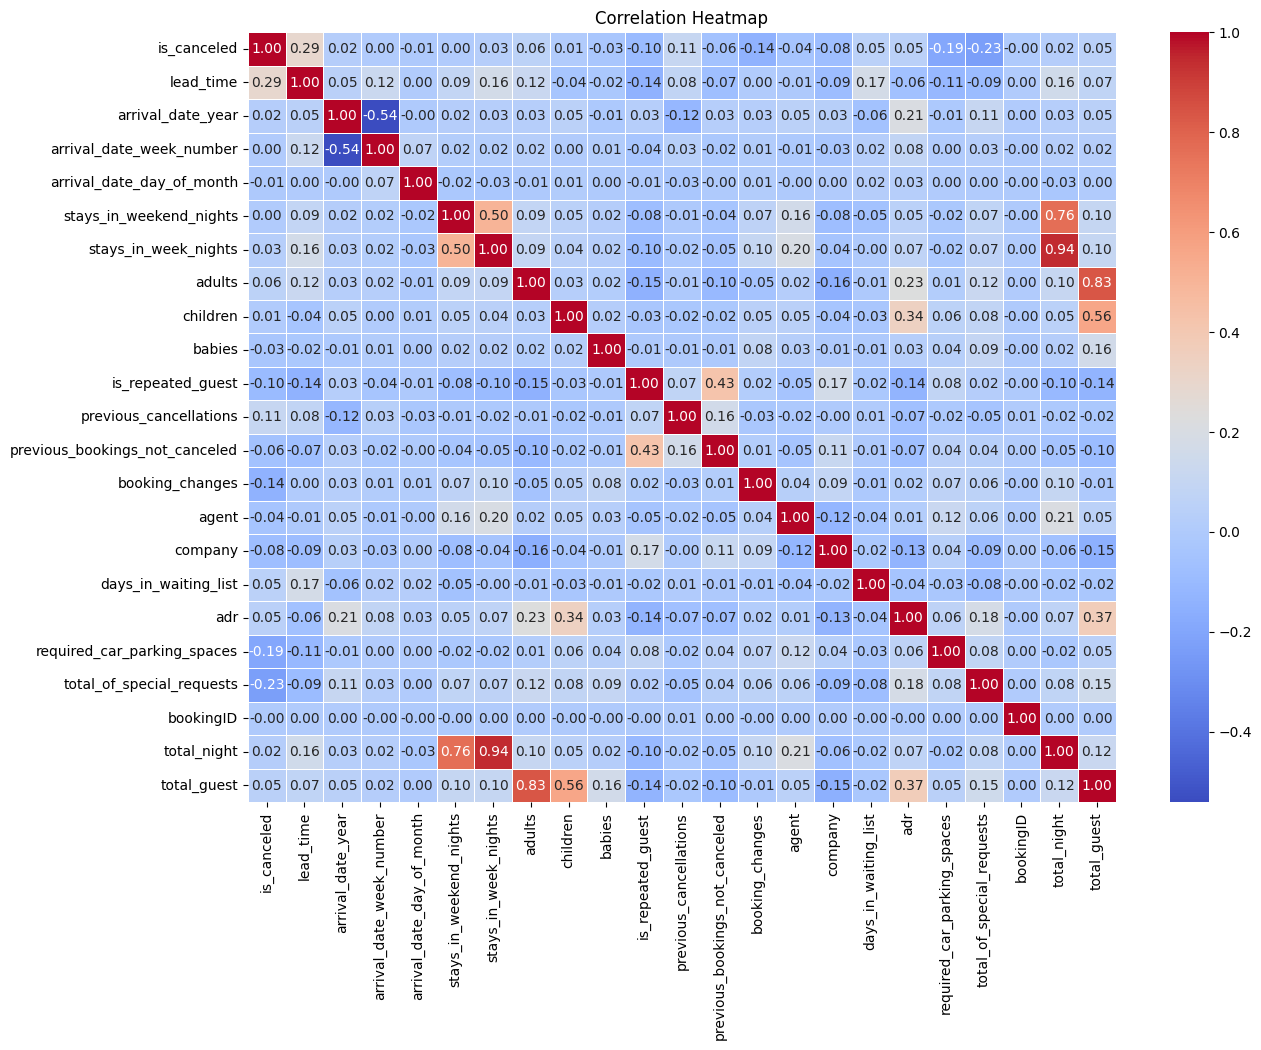

In [31]:
plt.figure(figsize=(14,10))

corr = df.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(
    corr,
    annot=True,      
    fmt=".2f",         
    cmap='coolwarm',
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

In [32]:
corr_target = corr['is_canceled'].sort_values(ascending=False)
corr_target

is_canceled                       1.000000
lead_time                         0.290870
previous_cancellations            0.106460
adults                            0.059303
days_in_waiting_list              0.054710
total_guest                       0.047265
adr                               0.046884
stays_in_week_nights              0.025387
arrival_date_year                 0.022560
total_night                       0.019621
children                          0.006436
arrival_date_week_number          0.003439
stays_in_weekend_nights           0.001743
bookingID                        -0.001439
arrival_date_day_of_month        -0.005429
babies                           -0.033168
agent                            -0.041660
previous_bookings_not_canceled   -0.055482
company                          -0.083498
is_repeated_guest                -0.097282
booking_changes                  -0.143101
required_car_parking_spaces      -0.193139
total_of_special_requests        -0.234052
Name: is_ca

Lead Time (0.29): Ini adalah faktor terkuat. Semakin lama jarak antara waktu pemesanan dan waktu kedatangan, semakin besar risiko tamu membatalkan pesanan.

Previous Cancellations (0.10): Tamu yang pernah membatalkan pesanan di masa lalu memiliki kecenderungan lebih tinggi untuk melakukannya lagi.

Adults (0.059303) & Total Guest (0.04): Semakin banyak jumlah orang (terutama orang dewasa), risiko pembatalan sedikit meningkat.

Days in Waiting List (0.054): Semakin lama tamu berada di daftar tunggu, semakin besar kemungkinan mereka membatalkan.

## Machine Learning — Predict Cancellation

### Target & Feature Selection

In [33]:
features = [
    'lead_time', 'adr', 'total_night', 'total_guest',
    'booking_changes', 'previous_cancellations',
    'required_car_parking_spaces', 'total_of_special_requests'
]

cat_features = [
    'hotel', 'market_segment', 'distribution_channel',
    'deposit_type', 'customer_type'
]

df_model = df[features + cat_features + ['is_canceled']]

### Encoding Categorical Features

In [34]:
encoders = {}  

cat_cols = ['hotel','market_segment','distribution_channel','deposit_type','customer_type']

for col in cat_cols:
    le = LabelEncoder()              
    df_model[col] = le.fit_transform(df_model[col]) 
    encoders[col] = le            

### Split Data

In [36]:
X = df_model.drop('is_canceled', axis=1)
y = df_model['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Logistic Regression Model

In [37]:
lr = LogisticRegression(max_iter=1000,class_weight='balanced',solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     10503
           1       0.69      0.70      0.69      6156

    accuracy                           0.77     16659
   macro avg       0.76      0.76      0.76     16659
weighted avg       0.77      0.77      0.77     16659

ROC AUC: 0.8327636223494298


### Random Forest Model

In [38]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10503
           1       0.84      0.71      0.77      6156

    accuracy                           0.84     16659
   macro avg       0.84      0.81      0.82     16659
weighted avg       0.84      0.84      0.84     16659

ROC AUC: 0.906611431357494


### XGboost Model

In [39]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     10503
           1       0.78      0.74      0.76      6156

    accuracy                           0.83     16659
   macro avg       0.81      0.81      0.81     16659
weighted avg       0.82      0.83      0.82     16659

ROC AUC: 0.8961670779789579


### ROC Curve

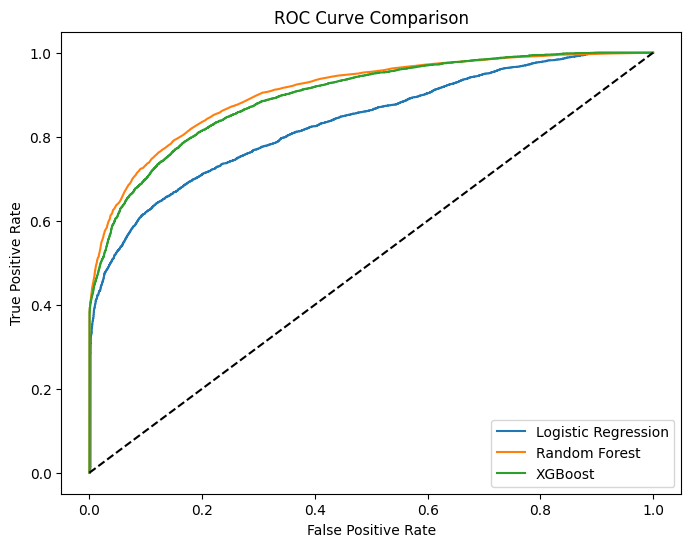

In [40]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')

plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Hyperparameter tuning - Model XGBoost

#### Hyperparameter Grid

In [41]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

#### GridSearchCV

In [42]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='recall', 
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200], 'subsample': [0.8, 1.0]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


#### Best Model

In [43]:
best_xgb = grid_search.best_estimator_

print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


#### Evaluasi Model Setelah Tuning

In [44]:
y_prob_best = best_xgb.predict_proba(X_test)[:, 1]
y_pred_best = (y_prob_best >= 0.4).astype(int)

print("XGBoost Tuned Model")
print(classification_report(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best))

XGBoost Tuned Model
              precision    recall  f1-score   support

           0       0.89      0.75      0.82     10503
           1       0.66      0.84      0.74      6156

    accuracy                           0.79     16659
   macro avg       0.78      0.80      0.78     16659
weighted avg       0.81      0.79      0.79     16659

ROC AUC: 0.8947923817923367


#### Confusion Matrix

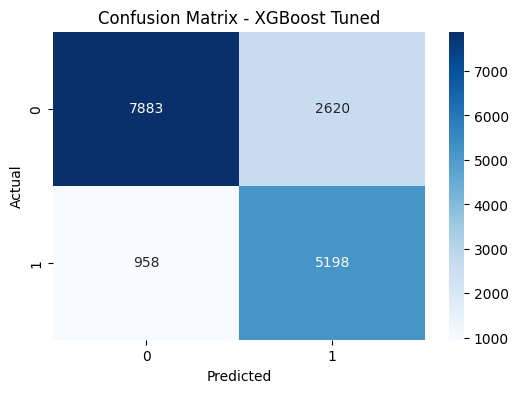

In [45]:
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost Tuned")
plt.show()

### Hyperparameter tuning - Model Random Forest

#### Hyperparameter Grid

In [46]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

#### GridSearchCV

In [47]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='recall', 
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [100, 200]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


#### Best Model

In [48]:
best_rf = grid_search.best_estimator_

print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


#### Evaluasi Model Setelah Tuning

In [49]:
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_prob_rf >= 0.4).astype(int)

print("Random Forest Tuned Model")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Tuned Model
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     10503
           1       0.71      0.83      0.76      6156

    accuracy                           0.81     16659
   macro avg       0.80      0.82      0.80     16659
weighted avg       0.82      0.81      0.81     16659

ROC AUC: 0.9058914879173419


#### Confusion Matrix

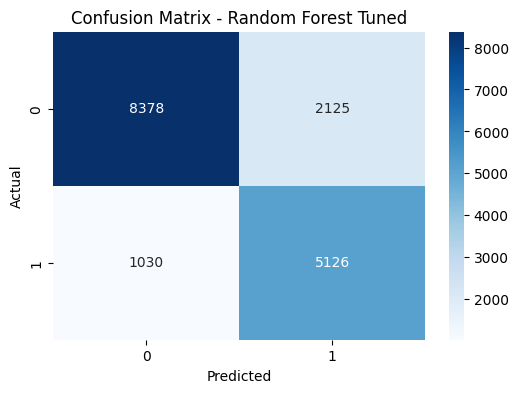

In [50]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Tuned")
plt.show()

**Alasan Memilih Random Forest Model**

- **Recall cancel tetap tinggi (0.83)**
  * Model mampu mendeteksi sebagian besar booking yang berpotensi cancel.

- **Precision lebih baik dibanding XGBoost (0.71 vs 0.66)**
  * Mengurangi false alarm, sehingga intervensi bisnis lebih efisien.

- **ROC AUC tertinggi (0.906)**
  * Kemampuan model membedakan booking cancel vs tidak cancel lebih kuat dan stabil.

- **Akurasi keseluruhan lebih tinggi (81%)**
  * Performa model lebih konsisten untuk keseluruhan data.

- **Trade-off terbaik antara risiko & biaya bisnis**
  * Tidak terlalu agresif seperti XGBoost, namun tetap sensitif terhadap cancel.

- **Lebih robust terhadap noise & overfitting**
  * Cocok untuk data booking dengan banyak variasi perilaku pelanggan.

- **Lebih mudah dijelaskan ke stakeholder bisnis**
  * Feature importance jelas dan intuitif (lead time, deposit, history cancel, dll).

- **Lebih siap untuk implementasi operasional**
  * Stabil, tidak terlalu sensitif terhadap threshold, dan mudah dipelihara.

#### Feature Importance Best model Random Forest

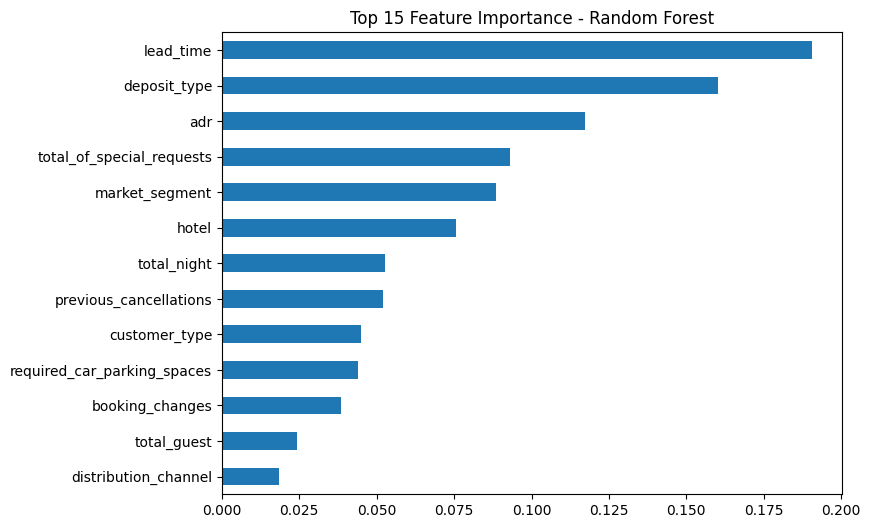

In [51]:
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).head(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Feature Importance - Random Forest")
plt.show()

In [53]:
# Save model
import joblib
joblib.dump(best_rf, "rf_cancellation_model.pkl")
print("Model saved as rf_cancellation_model.pkl")
joblib.dump(encoders, r"D:\Interview\encoder.pkl")
print("Encoder saved successfully!")

Model saved as rf_cancellation_model.pkl
Encoder saved successfully!


## Kesimpulan

Berdasarkan hasil Exploratory Data Analysis (EDA) serta Feature Importance dari model Random Forest, dapat disimpulkan bahwa perilaku pembatalan booking hotel dipengaruhi secara signifikan oleh faktor waktu pemesanan, karakteristik tamu, segmen pasar, serta kebijakan booking yang diterapkan.

1. Karakteristik Operasional Hotel

- Mayoritas tamu menginap dalam durasi pendek (1–5 malam) dengan jumlah tamu terbanyak sebanyak 2 orang.
- Tarif harian rata-rata (ADR) terkonsentrasi pada rentang 70–100, menunjukkan hotel menyasar segmen pasar menengah.

2. Faktor Risiko Tinggi Pembatalan (High Risk)

- Lead Time merupakan faktor terkuat: semakin jauh hari pemesanan dilakukan, semakin tinggi risiko pembatalan.
- Segmen Groups memiliki tingkat pembatalan tertinggi (>60%), disusul oleh saluran TA/TO (~40%).
- Deposit Non-Refund menunjukkan anomali dengan tingkat pembatalan hampir 100%, mengindikasikan potensi masalah sistem atau perilaku agen.
- Tamu baru (New Guest) memiliki risiko pembatalan 3,8 kali lebih tinggi dibanding tamu langganan.

3. Faktor Kepercayaan Tinggi (Low Risk)

- Tamu dengan banyak Special Requests cenderung sangat jarang membatalkan pesanan.
- Tamu yang melakukan booking changes menunjukkan komitmen tinggi untuk tetap datang.
- Tamu yang membutuhkan fasilitas parkir hampir tidak pernah membatalkan pesanan.

## Rekomendasi

1. Strategi Pencegahan Pembatalan (Retention Strategy)

- Terapkan sistem Early Warning System untuk booking dengan lead time >30 hari melalui email konfirmasi bertahap (H-30, H-14, H-7).
- Berikan insentif khusus untuk tamu baru yang hanya bisa diklaim saat check-in guna menekan risiko pembatalan.
- Dorong interaksi tamu melalui fitur Special Requests pada formulir pemesanan untuk meningkatkan komitmen.

2. Optimalisasi Revenue & Kebijakan Booking

- Evaluasi ulang kebijakan booking untuk segmen Groups dan TA/TO dengan menerapkan uang muka atau batas pembatalan lebih ketat.
- Manfaatkan fasilitas parkir sebagai nilai jual utama karena segmen ini memiliki tingkat kehadiran tinggi.

3. Peningkatan Kualitas Data & Sistem

- Lakukan audit menyeluruh terhadap sistem Deposit Non-Refund untuk memastikan tidak terjadi kesalahan sistem atau penyalahgunaan.
- Lakukan analisis profitabilitas per segmen (Direct vs TA/TO) untuk menentukan strategi alokasi kamar yang optimal.